In [36]:
import os
import cv2
from matplotlib import pyplot as plt

# Path to the directory containing images to be labeled
image_directory = 'result'

# Path to the directory where labeled images will be saved
output_directory = 'resultLabel'

# Names of the objects to be detected
object_names = ['fraction']

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Start labeling images
for image_file in image_files:
    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_file))
    
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    # Ask user to enter the label for the image
    label = input(f"Enter label for this image (choose from {object_names}): ")

    # Save the label to a text file
    with open(os.path.join(output_directory, image_file.split('.')[0] + '.txt'), 'w') as f:
        f.write(f"{label}\n")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'result'

In [1]:
import os

# Path to the directory containing images to be labeled
image_directory = 'result'

# Path to the directory where labeled images will be saved
output_directory = 'resultLabel'

# Name of the label for all images in the directory
label = 'fraction'

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Label all images
for image_file in image_files:
    # Save the label to a text file
    with open(os.path.join(output_directory, image_file.split('.')[0] + '.txt'), 'w') as f:
        f.write(f"{label}\n")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'result'

In [2]:
import os
import cv2

# Path to the directory containing images to be labeled
image_directory = 'Physical'

# Path to the directory where labeled images will be saved
output_directory = 'physicalLabel'

# Name of the label for all images in the directory
label_name = 'fraction'

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Label all images with the specified label
for image_file in image_files:
    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_file))

    # Set font type
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Set position for the text (bottom left corner)
    position = (10, image.shape[0] - 10) # image.shape[0] gives height of the image

    # Add text to image
    cv2.putText(image, label_name, position, font, 1, (0, 255, 0), 2)

    # Save the image with the label
    cv2.imwrite(os.path.join(output_directory, image_file), image)


In [1]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2)
ERROR: No matching distribution found for tensorflow==2.4.0


In [2]:
x = []
y = []
#datadir = 'myDataset/dataset'
datadir = 'converted'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

6000
6000
labels : ['2_3', '6_0', '7_5', '4_8', '6_3', '0_0', '7_2', '8_7', '2_5', '6_2', '8_9', '0_7', '2_4', '2_1', '3_6', '3_8', '3_4', '5_9', '7_9', '8_5', '3_0', '6_1', '9_5', '9_1', '1_1', '1_6', '4_3', '1_8', '0_2', '7_0', '6_4', '6_7', '2_9', '1_7', '5_4', '6_9', '8_1', '3_5', '9_0', '2_8', '5_7', '8_2', '7_1', '5_5', '7_7', '9_4', '4_7', '4_4', '0_5', '3_9', '4_2', '6_6', '8_6', '7_6', '3_3', '2_7', '0_6', '4_0', '5_0', '7_4', '9_7', '1_5', '5_3', '6_5', '1_4', '0_9', '0_3', '8_8', '3_2', '8_3', '5_2', '2_2', '9_9', '0_1', '8_0', '2_6', '3_1', '1_3', '4_9', '7_3', '4_6', '9_2', '2_0', '0_4', '8_4', '4_5', '3_7', '6_8', '1_9', '1_0', '9_8', '5_6', '5_8', '9_6', '0_8', '1_2', '7_8', '4_1', '9_3', '5_1']


ValueError: num must be an integer with 1 <= num <= 25, not 26

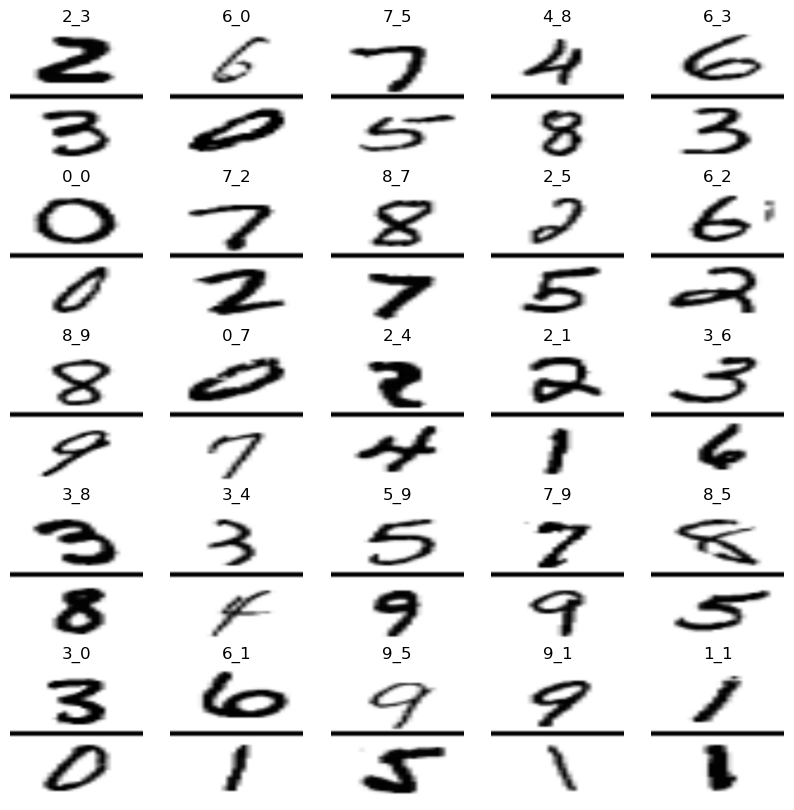

In [3]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

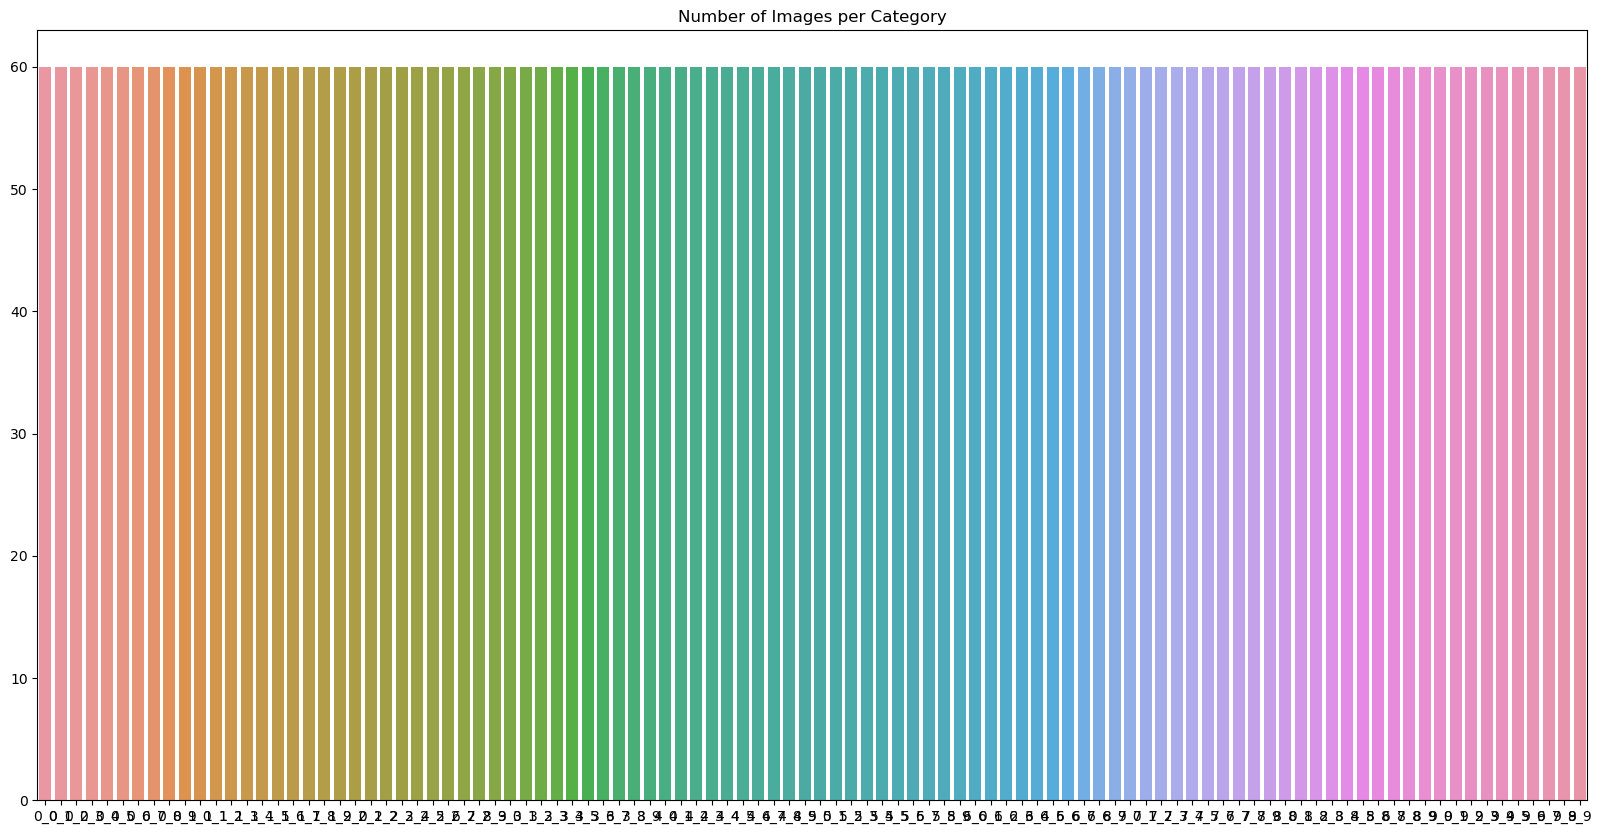

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [5]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))

6000


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

6000


In [7]:
#the model is 80 - 20 training and testing size
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

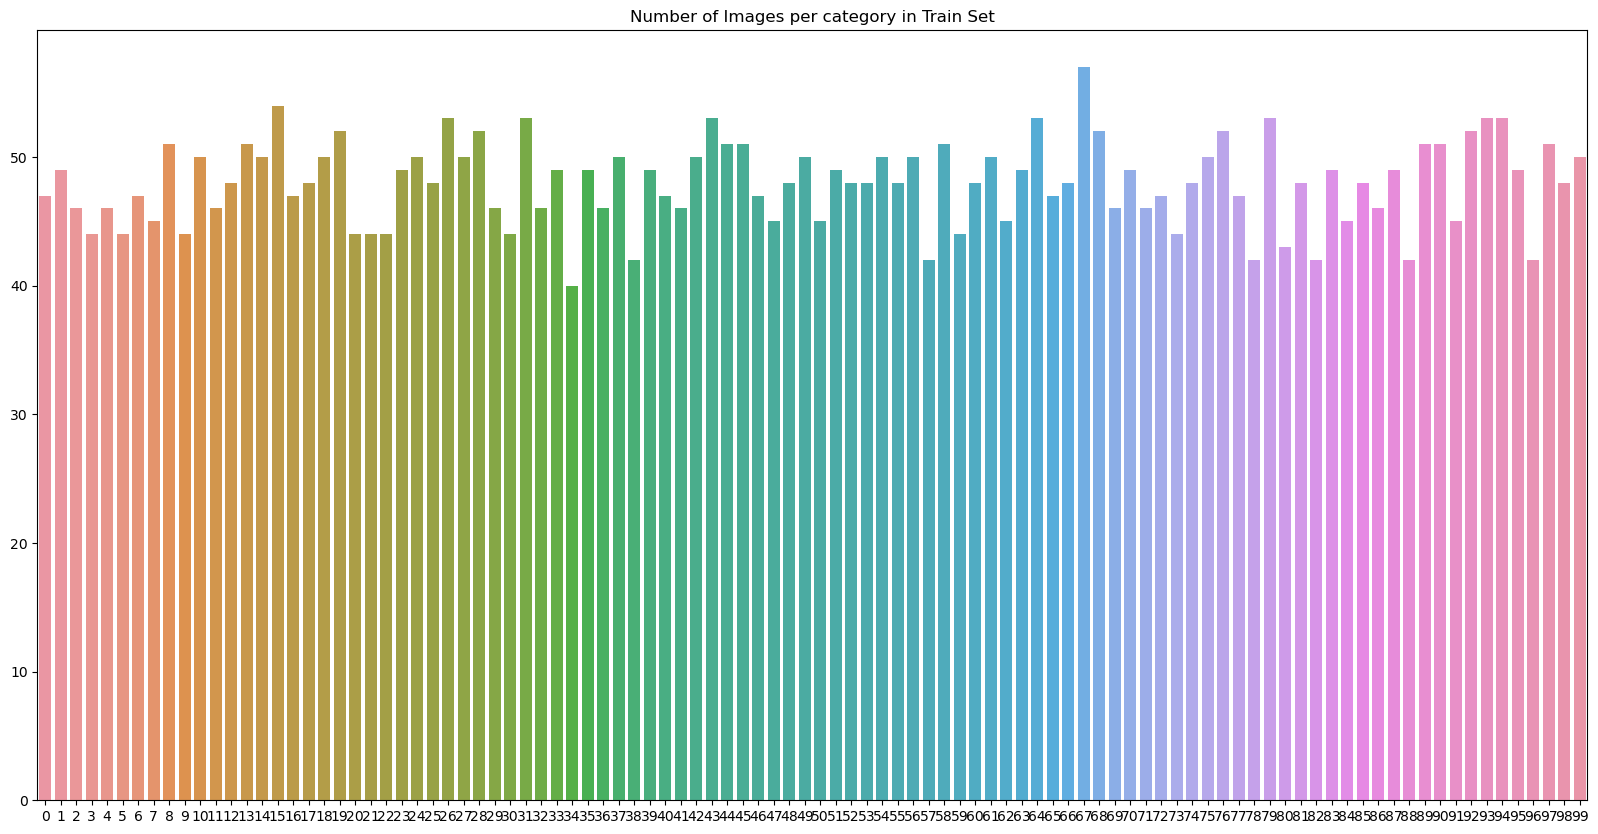

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

In [9]:
!pip install tensorflow
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [11]:
!pip install tensorflow
import tensorflow as tf
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4800, 32, 32, 1)
(1200, 32, 32, 1)
(4800, 100)
(1200, 100)


In [13]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(100, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [14]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

In [15]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [16]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=80, validation_data=(X_test, Y_test))
#hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/80
38/38 [==============================] - 5s 113ms/step - loss: 5.5007 - accuracy: 0.0102 - val_loss: 5.1649 - val_accuracy: 0.0092
Epoch 2/80
38/38 [==============================] - 3s 83ms/step - loss: 4.8544 - accuracy: 0.0131 - val_loss: 4.8798 - val_accuracy: 0.0042
Epoch 3/80
38/38 [==============================] - 2s 64ms/step - loss: 4.7248 - accuracy: 0.0188 - val_loss: 4.7643 - val_accuracy: 0.0150
Epoch 4/80
38/38 [==============================] - 2s 62ms/step - loss: 4.5921 - accuracy: 0.0292 - val_loss: 4.4588 - val_accuracy: 0.0450
Epoch 5/80
38/38 [==============================] - 5s 119ms/step - loss: 4.0851 - accuracy: 0.0781 - val_loss: 3.7639 - val_accuracy: 0.1225
Epoch 6/80
38/38 [==============================] - 2s 62ms/step - loss: 3.5307 - accuracy: 0.1456 - val_loss: 3.4061 - val_accuracy: 0.1725
Epoch 7/80
38/38 [==============================] - 3s 77ms/step - loss: 2.9883 - accuracy: 0.2510 - val_loss: 3.0298 - val_accuracy: 0.2475
Epoch 8/80


38/38 [==============================] - 4s 117ms/step - loss: 0.4315 - accuracy: 0.9023 - val_loss: 0.4613 - val_accuracy: 0.9183
Epoch 59/80
38/38 [==============================] - 6s 152ms/step - loss: 0.4154 - accuracy: 0.9071 - val_loss: 0.4686 - val_accuracy: 0.9142
Epoch 60/80
38/38 [==============================] - 6s 148ms/step - loss: 0.4543 - accuracy: 0.8931 - val_loss: 0.4503 - val_accuracy: 0.9200
Epoch 61/80
38/38 [==============================] - 6s 144ms/step - loss: 0.4277 - accuracy: 0.9008 - val_loss: 0.4801 - val_accuracy: 0.9075
Epoch 62/80
38/38 [==============================] - 6s 149ms/step - loss: 0.4333 - accuracy: 0.9038 - val_loss: 0.4172 - val_accuracy: 0.9250
Epoch 63/80
38/38 [==============================] - 5s 142ms/step - loss: 0.4086 - accuracy: 0.9131 - val_loss: 0.4517 - val_accuracy: 0.9117
Epoch 64/80
38/38 [==============================] - 6s 149ms/step - loss: 0.4085 - accuracy: 0.9075 - val_loss: 0.4059 - val_accuracy: 0.9258
Epoch 65/80

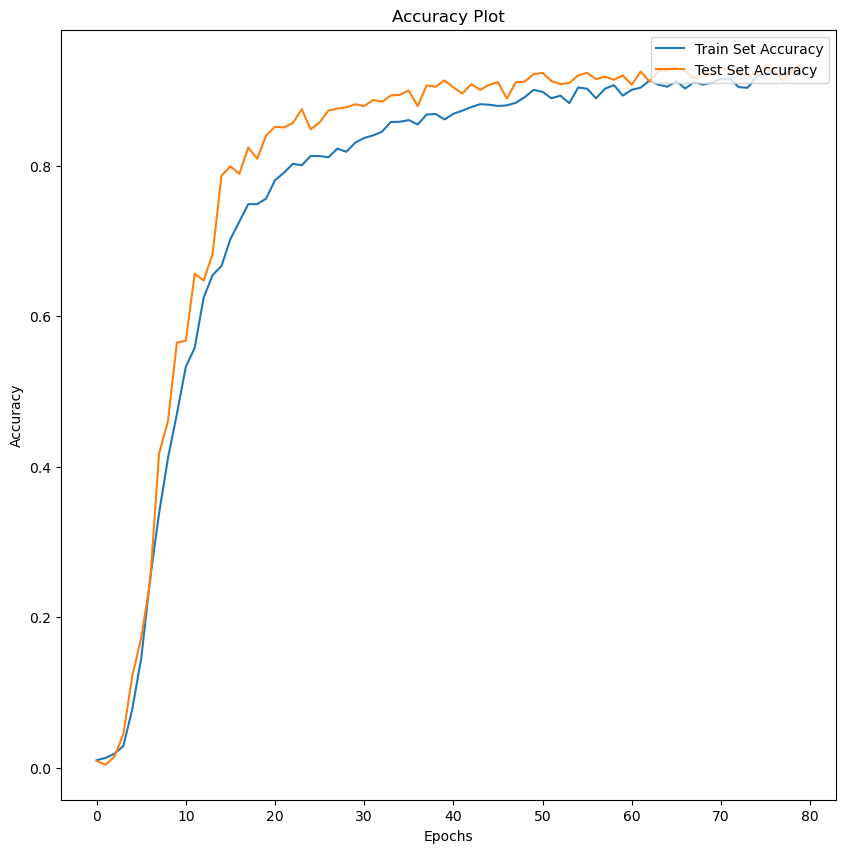

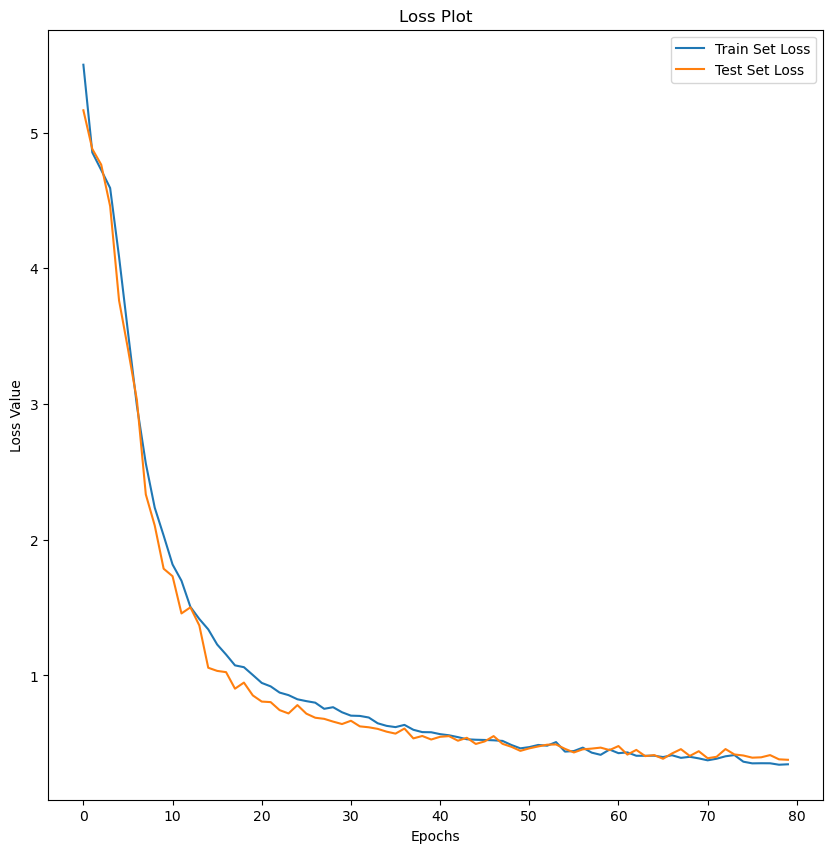

In [17]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [18]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

38/38 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.82      0.90        11
           2       0.93      1.00      0.97        14
           3       1.00      0.94      0.97        16
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        13
           7       1.00      0.93      0.97        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        16
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        14
          12       1.00      0.92      0.96        12
          13       1.00      0.89      0.94         9
          14       1.00      1.00      1.00        10
          15       0.83      0.83      0.83         6
          16       0.87     

In [19]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    #labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'fraction','result']
    #labels = ['denominator', 'outlined_nominator', 'non_fraction', 'minus_sign', 'fraction_bar', 'numerator', 'fraction', 'digit2', 'slash_bar', 'blank_numerator', 'plus_sign', 'digit1', 'multiplication_sign']
    labels = ['0_7', '2_6', '0_3', '4_6', '6_8', '3_8', '4_8', '5_1', '8_6', '0_1', '4_1', '0_6', '1_4', '9_4', '8_7', '4_3', '5_6', '0_5', '6_1', '1_3', '5_4', '8_8', '8_3', '7_8', '6_7', '3_7', '1_0', '6_9', '6_4', '1_8', '0_9', '2_0', '1_2', '1_7', '2_5', '9_7', '7_4', '7_6', '9_1', '2_1', '7_7', '1_9', '8_2', '6_5', '2_2', '5_9', '1_1', '5_7', '8_1', '6_0', '9_3', '3_6', '6_6', '0_4', '8_5', '5_0', '3_2', '3_3', '9_0', '0_8', '8_9', '9_6', '7_9', '4_4', '2_7', '3_5', '5_8', '3_9', '9_8', '7_1', '7_5', '2_4', '4_7', '6_3', '2_3', '4_5', '9_9', '3_0', '2_9', '4_9', '9_5', '1_5', '7_2', '5_2', '9_2', '4_0', '1_6', '5_5', '0_2', '0_0', '5_3', '2_8', '3_1', '7_0', '7_3', '8_0', '4_2', '3_4', '6_2', '8_4']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [20]:
#Second Version
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    #labels = ['denominator', 'outlined_nominator', 'non_fraction', 'minus_sign', 'fraction_bar', 'numerator', 'fraction', 'digit2', 'slash_bar', 'blank_numerator', 'plus_sign', 'digit1', 'multiplication_sign']
    labels = ['0_7', '2_6', '0_3', '4_6', '6_8', '3_8', '4_8', '5_1', '8_6', '0_1', '4_1', '0_6', '1_4', '9_4', '8_7', '4_3', '5_6', '0_5', '6_1', '1_3', '5_4', '8_8', '8_3', '7_8', '6_7', '3_7', '1_0', '6_9', '6_4', '1_8', '0_9', '2_0', '1_2', '1_7', '2_5', '9_7', '7_4', '7_6', '9_1', '2_1', '7_7', '1_9', '8_2', '6_5', '2_2', '5_9', '1_1', '5_7', '8_1', '6_0', '9_3', '3_6', '6_6', '0_4', '8_5', '5_0', '3_2', '3_3', '9_0', '0_8', '8_9', '9_6', '7_9', '4_4', '2_7', '3_5', '5_8', '3_9', '9_8', '7_1', '7_5', '2_4', '4_7', '6_3', '2_3', '4_5', '9_9', '3_0', '2_9', '4_9', '9_5', '1_5', '7_2', '5_2', '9_2', '4_0', '1_6', '5_5', '0_2', '0_0', '5_3', '2_8', '3_1', '7_0', '7_3', '8_0', '4_2', '3_4', '6_2', '8_4']    
    for c in contours:
        detected_labels = []

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20 <= w and 30 <= h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw) / 2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded / 255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            detected_labels.append(label)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return detected_labels

1/1 [==============================] - 0s 23ms/step


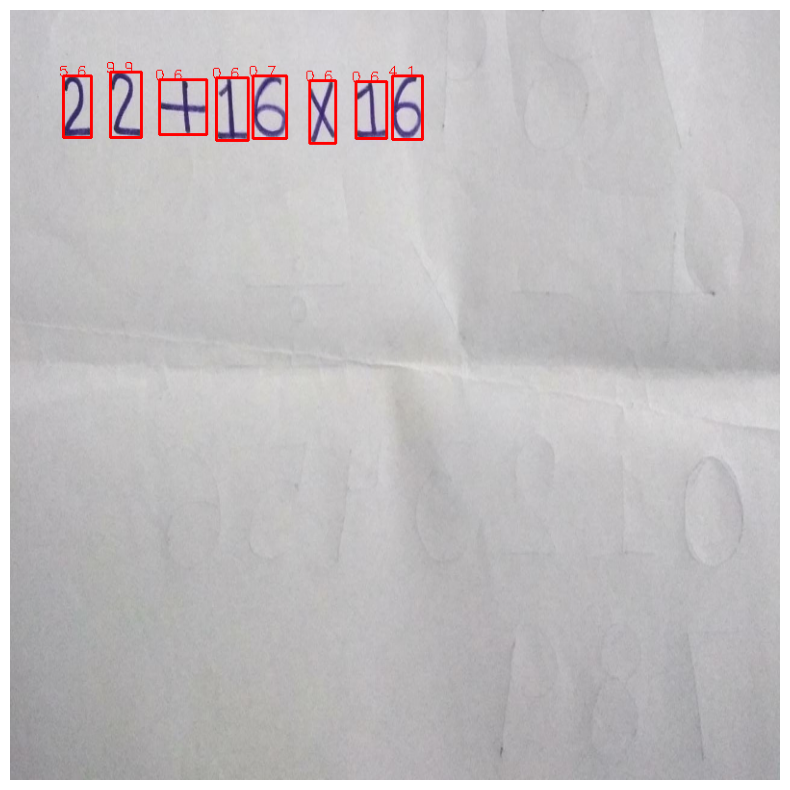

mytest.jpg


In [21]:
test_pipeline('mytest.jpg')
print('mytest.jpg')

1/1 [==============================] - 0s 26ms/step


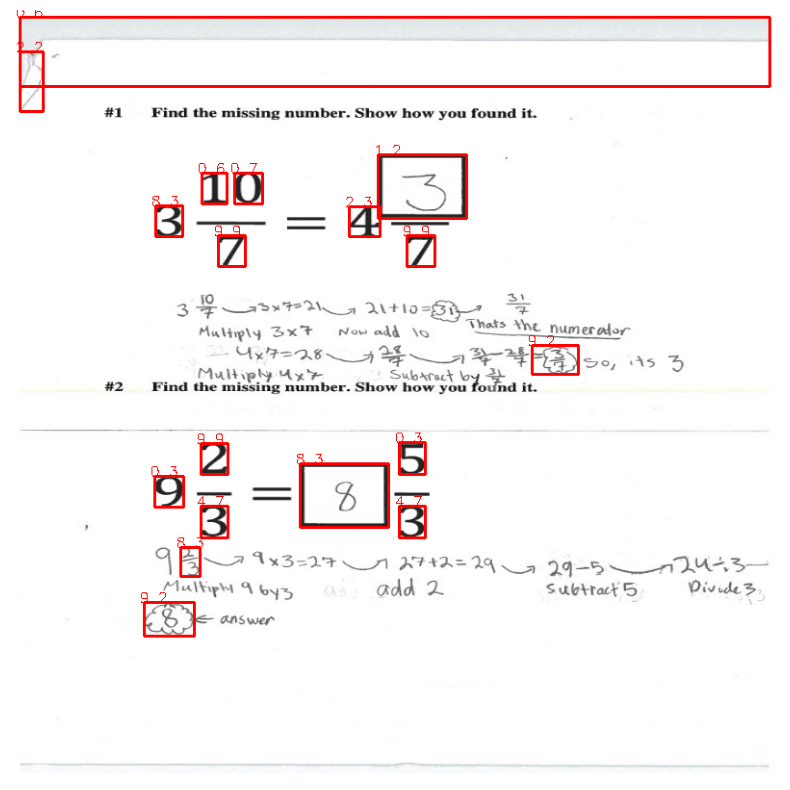

Number of fraction objects: 0


In [22]:
detected_labels = test_pipeline('5.jpg')
fraction_count = detected_labels.count('fraction')
print('Number of fraction objects:', fraction_count)